In [1]:
# -*- coding: utf-8 -*- 
# This code is written in Python 3.7. To install the required packages, run the following commands:
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the N_BaIoT dataset. 
# df = pd.read_csv('/home/ibibers@ads.iu.edu/IOT_Datasets/device7.csv')
# implemented KNeighbors Classifier Classifier. 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import time
import numpy as np
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



2024-05-27 22:10:11.139441: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 22:10:11.395997: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 22:10:12.238583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

df = pd.read_csv('/home/ibibers@ads.iu.edu/IOT_Datasets/device7.csv')


# Drop duplicates
df = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value
one_value = df.columns[df.nunique() == 1]
df = df.drop(columns = one_value, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115936 entries, 0 to 119999
Columns: 116 entries, MI_dir_L5_weight to label
dtypes: float64(115), int64(1)
memory usage: 103.5 MB


In [3]:
# descripe the lables

# Extract subsample of data
print (" Extract subsample of data: ")
print(df['label'].value_counts())

 Extract subsample of data: 
label
4    20000
3    20000
6    20000
1    19623
5    18157
2    18156
Name: count, dtype: int64


In [4]:
dropped_df = ['label']
X = df.drop(dropped_df, axis=1)
y = df['label']


In [5]:
# Clear TensorFlow session
tf.keras.backend.clear_session()

In [6]:

start_time = time.time()

# Initial train test split set and split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Prepare the data for CNN
# Reshape the data into 3D array (pseudo-image representation)
# Each sample will be reshaped into a 3D array with shape (x, y, z)
num_timesteps = len(X.columns)  # Number of timesteps (X, Y, Z)
num_channels = 1  # Number of channels (since it's grayscale)
X_train_reshaped = X_train_scaled.reshape(-1, num_timesteps, num_channels)
X_test_reshaped = X_test_scaled.reshape(-1, num_timesteps, num_channels)


# 4. Build and compile the CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(num_timesteps, num_channels)))
# Add more layers as needed
# ...
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


start_train_time = time.time()
# Train the CNN model
model.fit(X_train_reshaped, y_train, epochs=30, validation_data=(X_test_reshaped, y_test))
train_time = time.time() - start_train_time

start_pred_time = time.time()
# Make predictions
y_pred = model.predict(X_test_reshaped)
pred_time = time.time() - start_pred_time


# Calculate total time
total_time = time.time() - start_time

Epoch 1/30


/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-27 22:10:15.615642: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


2537/2537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7255 - loss: 0.4954 - val_accuracy: 0.7657 - val_loss: 0.3852
Epoch 2/30
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7660 - loss: 0.3841 - val_accuracy: 0.7810 - val_loss: 0.3583
Epoch 3/30
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7862 - loss: 0.3576 - val_accuracy: 0.7884 - val_loss: 0.3391
Epoch 4/30
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8084 - loss: 0.3262 - val_accuracy: 0.8035 - val_loss: 0.3157
Epoch 5/30
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8220 - loss: 0.3067 - val_accuracy: 0.8293 - val_loss: 0.2917
Epoch 6/30
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8273 - loss: 0.2895 - val_accuracy: 0.8321 - val_loss: 0.2870
Epoch 7/30
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8301 - loss: 0.2784 - val_accuracy: 0.8342 - val_loss: 0.2754
Epoch 8/30
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8337 - loss: 0.2725 - val_accurac

In [7]:

print("Time taken for training:{:f} seconds".format(train_time))
print("Time taken for prediction: {:f} seconds".format(pred_time))
print("Total time taken:{:f} seconds".format(total_time))

Time taken for training:254.689687 seconds
Time taken for prediction: 2.306965 seconds
Total time taken:257.397327 seconds


In [8]:
# 6. Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_accuracy}')

1087/1087 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8367 - loss: 0.2483
Test Accuracy: 0.835369884967804


In [9]:
# 7. Generate classification report
predictions = np.argmax(y_pred, axis=-1)
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5887
           2       0.75      0.00      0.00      5447
           3       0.96      1.00      0.98      6000
           4       1.00      1.00      1.00      6000
           5       0.50      1.00      0.67      5447
           6       1.00      0.96      0.98      6000

    accuracy                           0.84     34781
   macro avg       0.87      0.83      0.77     34781
weighted avg       0.87      0.84      0.78     34781



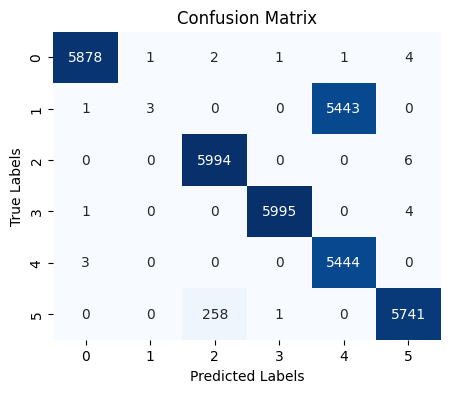

In [12]:
# 7. Generate confusion matrix
predictions = np.argmax(y_pred, axis=-1)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()